### Exploratory Data Analysis of Haberman Data Set

This data set consists of 4 coulmns that are loaded in the following order:

1. Ages -> Age of the patients who under went breast cancer surgery
2. Year of operation -> The year in which the surgery was performed
3. Number of Positive auxilary nodes -> The number of auxilary nodes detected with cancer cells i.e. infected cells
4. Status -> Survived with in five years of surgery or not.

The first 3 being the feature variables and the status being the class variable

#### Objective

Given the Age of patient, Year of operation and the number of positive axilary nodes detected we should detect the status or survival of the patient

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columnNames = ['age','year_of_operation','pos_axil_nodes','status']
dataset = pd.read_csv('haberman.csv', names = columnNames)
dataset.status.unique()

array([1, 2], dtype=int64)

In [3]:
# Numbers 1 and 2 mean survived and not survived. Words are better suitable for legends in the graphs
dataset.status.replace((1,2),("Survived", "Not Survived"), inplace=True)
dataset.tail(5)

,age,year_of_operation,pos_axil_nodes,status
301,75,62,1,Survived
302,76,67,0,Survived
303,77,65,3,Survived
304,78,65,1,Not Survived
305,83,58,2,Not Survived


In [4]:
print("Number of Entries {}".format(dataset.shape[0])) #shape is a tuple of rows and columns
dataset.status.value_counts()

Number of Entries 306


Survived        225
Not Survived     81
Name: status, dtype: int64

The number survived is 225 and not survived is 81. 
The data is imbalanced.

### 2D Scatter plot

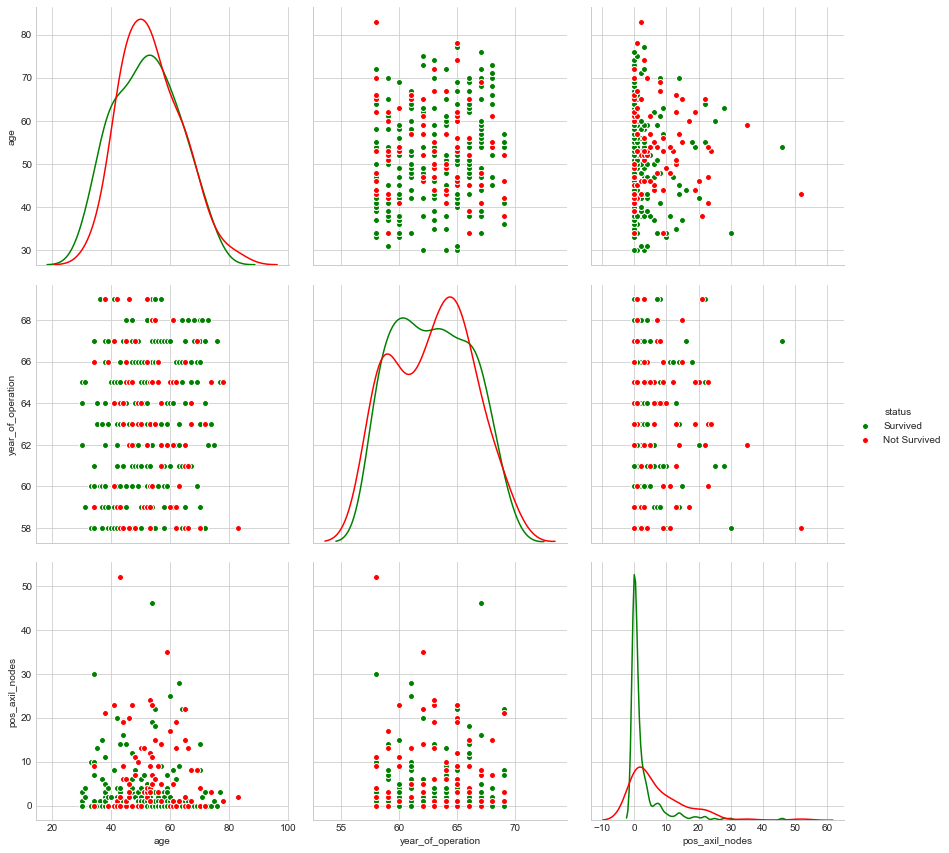

In [6]:
sns.set_style('whitegrid')
sns.pairplot(dataset, hue='status', palette={'Survived' : "green", 'Not Survived' : "red"}, size=4, vars=['age','year_of_operation','pos_axil_nodes'], 
             diag_kind='kde', markers = 'o')
plt.show()

1. None of the graphs provide a clean seperation for survivers or non survivers i.e. A linear or simple if..else model is not possible.
2. Positive axilary nodes vs Age plot offers some respite. It indicate that most of the survivers of any age have positive axilary nodes less that 5.
3. looking at the histogram of Year of operation we can say that in the year 1960 there we more number of survivers than non survivers and in the year 1964 the situation was reversed.
4. Not much can be gathered from age.
5. Positive axilary node is the most useful feature to determine status. The age and year offer minimal or no information

Looking at the PDFs produced in 2D scatter plot section it is evident that positive axilary nodes histogram has valuable infomration to offer so lets plot PDF and CDF of survived and not survived patient's positive axilary nodes column

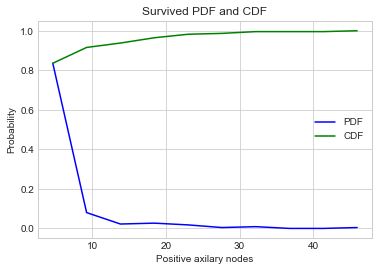

In [8]:
survived_patients = dataset[dataset['status'] == 'Survived']

not_survived_patients = dataset[dataset['status'] == 'Not Survived']

counts_survived, bin_edges = np.histogram(survived_patients['pos_axil_nodes'], bins=10, density=True)
pdf_survived = counts_survived / sum(counts_survived)
cdf_survived = np.cumsum(pdf_survived)

plt.title("Survived PDF and CDF")
plt.plot(bin_edges[1:],pdf_survived,color='blue')
plt.plot(bin_edges[1:],cdf_survived, color='green')
plt.xlabel('Positive axilary nodes')
plt.ylabel('Probability')
plt.legend(('PDF','CDF'))
plt.show()


1. 82% of the "survived patitents" had positive axilary nodes less than 3
2. 97% of the "survived patitents" had positive axilary nodes less than 10
3. 100% of the 'survived patients' had positve axilary nodes less than 30. 
   The percentage reached 100 at 30 nodes. so nodes more than 30 does not matter.
4. From 0% to 82% there is a gap of 3(0 to 3) infected nodes,
   from 82% to 97% there is a gap of 7(3 to 10) infected nodes and 
   from 97% to 100% there is a gap of 20(10 to 30) infected nodes. 
   Thus appoximately upto 80% of survived people had less than 4 infected nodes.
5. From the PDF it is clear that as the number of positive axilary nodes decreases the chances of survival increases

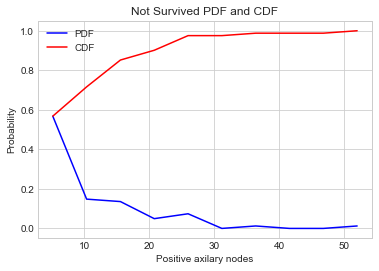

In [9]:
counts_not_survived, bin_edges = np.histogram(not_survived_patients['pos_axil_nodes'], bins=10, density=True)
pdf_not_survived = counts_not_survived / sum(counts_not_survived)
cdf_not_survived = np.cumsum(pdf_not_survived)
plt.title("Not Survived PDF and CDF")
plt.plot(bin_edges[1:],pdf_not_survived,color='blue')
plt.plot(bin_edges[1:],cdf_not_survived, color='red')
plt.xlabel('Positive axilary nodes')
plt.ylabel('Probability')
plt.legend(('PDF','CDF'))

plt.show()

1. 58% of "Not survived people" had upto 4 infected nodes.
2. 85% of "Not survived people" had upto 14 infected nodes.
3. 100% of "Not survived people" had infected nodes more than 34.
4. From 00% to 58% there is a gap of 04(0 to 4) infected nodes,
   from 58% to 85% there is a gap of 10(4 to 14) infected nodes and
   from 85% to 100% there is a gap of 20(14 to 34) infected nodes.
   Thus appoximately more than 60% of not survived people had more than 4 infected nodes 
1. Patients with Positive axilary nodes number greater than or equal to 40 do not survive.

### Analysis using Mean, Meadian, Standard deviation and MAD

In [10]:
print('-'*20 + "Entire Data Set" + '-'*20)
dataset.describe()

--------------------Entire Data Set--------------------


,age,year_of_operation,pos_axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


1. Most patients were between the age group 42 and 62 as detected by the mean and std.
2. There are outliers in the pos_axil_nodes as there is a large ga between mean and std.
3. Even though maximum number of axilary nodes in the data set is 52. 75% people have positive/infected axilary nodes less than equal to 4.
4. From our pdf analysis of pos_axil_nodes we had concluded that if the pos_axil_nodes number is less than 4 the patient will survive. As 75% people have pos_axil_nodes less than or equal to 4 the survivers number is significantly higher than the non survivers. 

In [11]:
print("MAD - {}".format(survived_patients['pos_axil_nodes'].mad()))
print('-'*20 + "Survived Data Set" + '-'*20)
survived_patients.describe()


MAD - 3.5336296296296363
--------------------Survived Data Set--------------------


,age,year_of_operation,pos_axil_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


1. 50% of survived people have zero pos_axil_nodes
2. 75% of survived people have less than or equal to 3 pos_axil_nodes
3. As 75% of people have pos_axil_nodes less than 3, the std and mad would not make much sense.

In [12]:
print('-'*20 + "Not survived Data Set" + '-'*20)
not_survived_patients.describe()


--------------------Not survived Data Set--------------------


,age,year_of_operation,pos_axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


1. 25% of non survived people had pos_axil_nodes up to 4 and 75% of non survived people had pos_axil_nodes up to 11 indicating that increas in pos_axil_nodes beyond 4 decreases the chance of survival drastically

### Box and Voilin plots

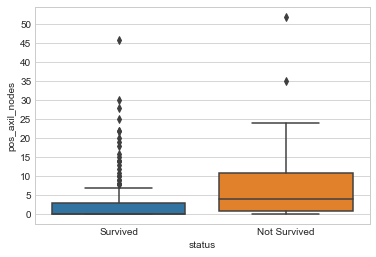

In [13]:
sns.boxplot(x='status',y='pos_axil_nodes',data = dataset)
plt.yticks(np.arange(min(dataset['pos_axil_nodes']),max(dataset['pos_axil_nodes'])+1,5))
plt.show()

1. 50% survived patients had no infected axilary nodes
2. 75% survived patients had less than 4 infected axilary nodes
3. 75% not survived patients had upto 11 infected axilary nodes
4. Patients with more that 46 infected nodes do not survive.

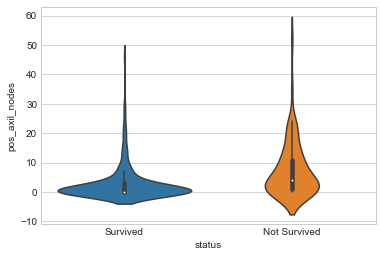

In [14]:
sns.violinplot(x='status',y='pos_axil_nodes',data=dataset)
plt.show()

1. The concentration of patients is more in the 0 to 5 infected nodes regions.

### Summary

1. The data is imbalanced with significantly more number of survivers(225) than non survivers(81)
2. Linear or simple if..else model cannot be derived as the data is interwound.
3. 75% of people with less than 4 infected nodes survive.
4. Only useful parameter to deterime the survival status is Positive axilary nodes.
5. Beyond 5 infected nodes the chances of survival drastically decreases.
6. 50% of survived patients do not have infected nodes